In [225]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [226]:
def read_json_file(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data


def get_zeros(data):
    zeros = []
    for i in range(len(data["scores"])):
        if data["scores"][i]["label"] == 0:
            zeros.append(data["scores"][i]["score"])
    return zeros

def get_ones(data):
    ones = []
    for i in range(len(data["scores"])):
        if data["scores"][i]["label"] == 1:
            ones.append(data["scores"][i]["score"])
    return ones

def get_labels(data):
    labels = []
    for i in range(len(data["scores"])):
        labels.append(data["scores"][i]["label"])
    return labels

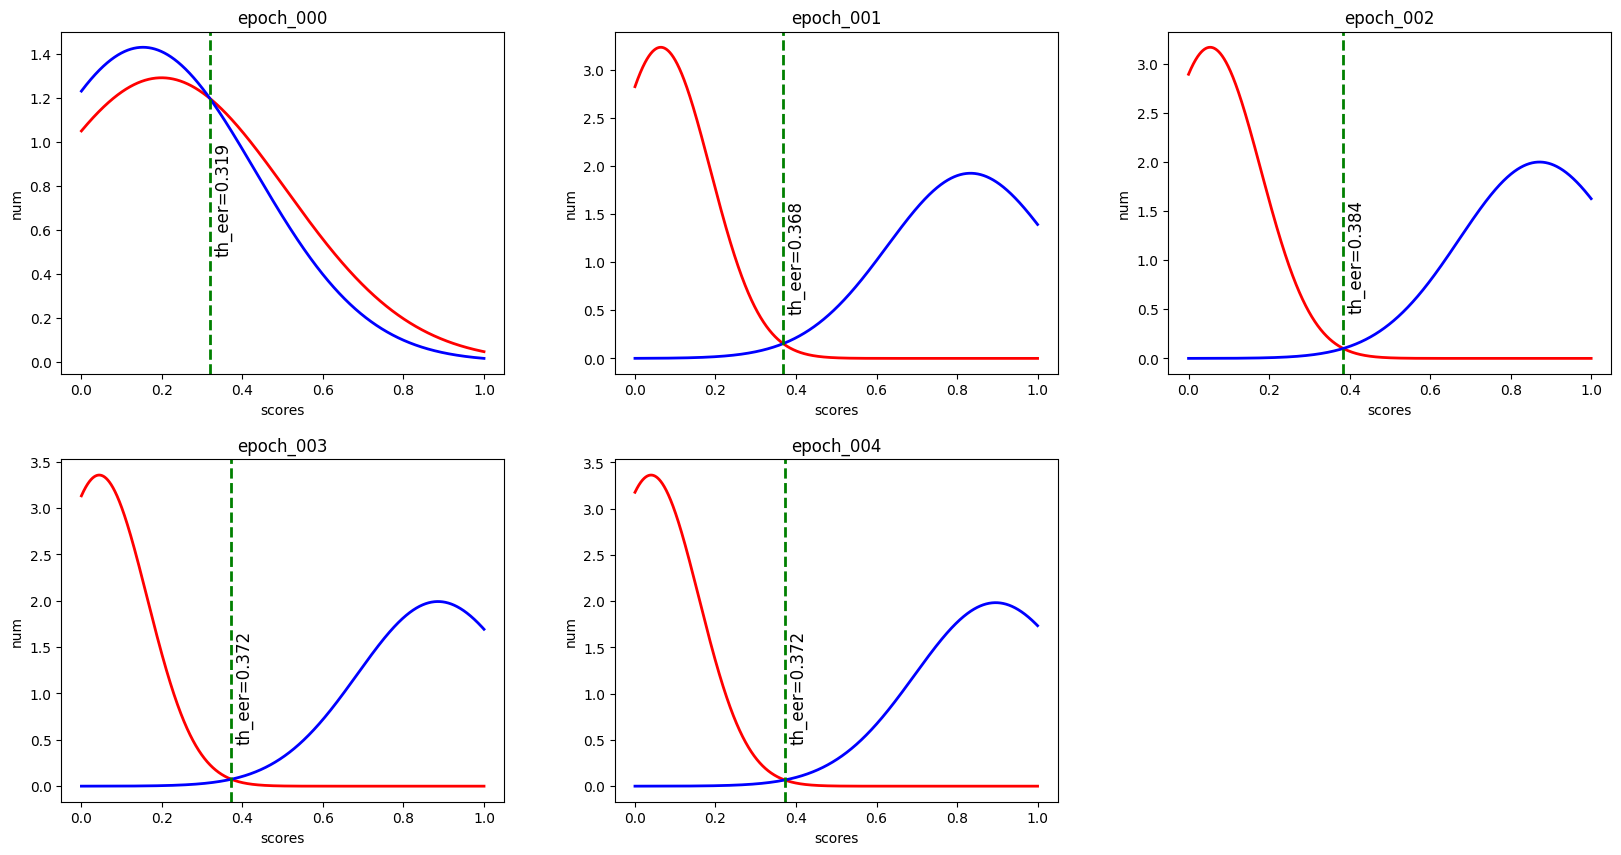

In [227]:
stats_dir = "../logs/stats/val_base"
stats_files = os.listdir(stats_dir)
num_rows = int(np.ceil(len(stats_files) / 3))

for i, filename in enumerate(os.listdir(stats_dir)):
    if filename.endswith(".json"):
        json_file = os.path.join(stats_dir, filename)
        data = read_json_file(json_file)
        zeros = get_zeros(data)
        ones = get_ones(data)
        labels = get_labels(data)
        title = filename.split(".")[0]

        plt.rcParams["figure.figsize"] = (20, 10)
        plt.subplots_adjust(wspace=0.25, hspace=0.25)
        plt.subplot(num_rows, 3, i + 1, title=title, xlabel="scores", ylabel="num")

        mean_zeros = np.mean(zeros)
        mean_ones = np.mean(ones)
        std_zeros = np.std(zeros)
        std_ones = np.std(ones)

        # hist, bins, _ = plt.hist(zeros, bins=100, density=True, alpha=0.7)
        # hist, bins, _ = plt.hist(ones, bins=100, density=True, alpha=0.7)
        step = len(zeros)
        x = np.linspace(0, 1, step)

        pdf_zeros = norm.pdf(x, mean_zeros, std_zeros)
        pdf_ones = norm.pdf(x, mean_ones, std_ones)

        plt.plot(np.linspace(0, 1, step), pdf_zeros, color="r", linewidth=2)
        plt.plot(np.linspace(0, 1, step), pdf_ones, color="b", linewidth=2)

        # th_eer is the intersection of the two pdfs
        idx = np.argwhere(np.diff(np.sign(pdf_zeros - pdf_ones))).flatten()
        plt.axvline(x=x[idx], color="g", linestyle="--", linewidth=2)
        plt.text(x[idx] + 0.01, 0.5, f"th_eer={x[idx][0]:.3f}", rotation=90, fontsize=12)

        plt.title(title)

In [228]:
num_samples = 10000
preds = np.random.rand(num_samples)

(array([1.04217492, 0.98316502, 0.98416519, 1.01817089, 1.01417022,
        1.03017291, 0.96216149, 1.00916938, 1.00216821, 0.95616049]),
 array([4.72786233e-05, 1.00030494e-01, 2.00013710e-01, 2.99996926e-01,
        3.99980141e-01, 4.99963357e-01, 5.99946572e-01, 6.99929788e-01,
        7.99913004e-01, 8.99896219e-01, 9.99879435e-01]),
 <BarContainer object of 10 artists>)

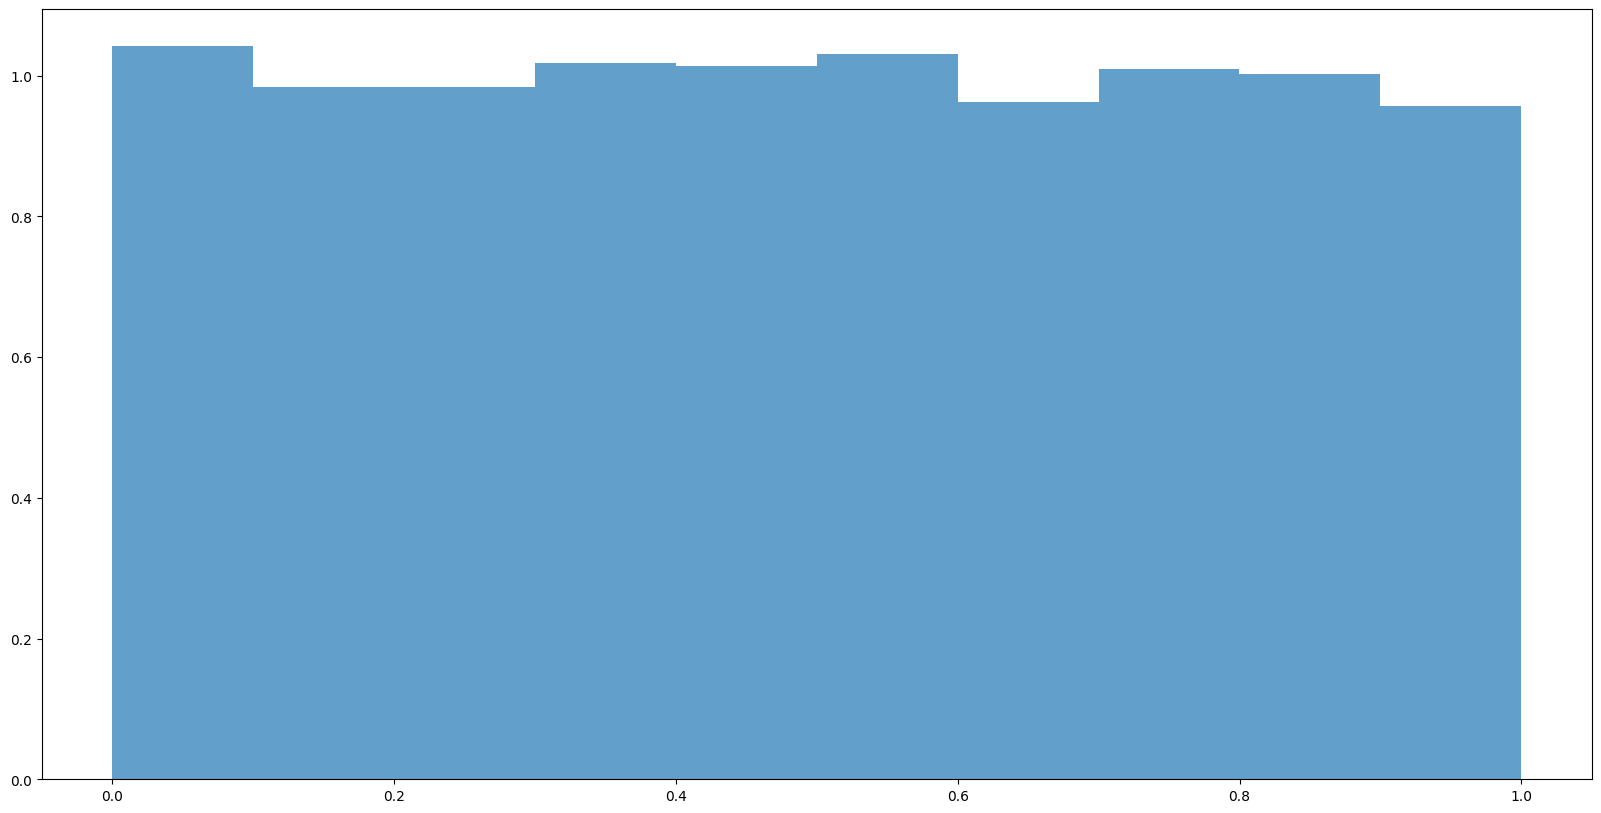

In [229]:
plt.hist(preds, bins=10, density=True, alpha=0.7)